In [3]:
# https://www.datacamp.com/community/tutorials/web-scraping-python-nlp

In [2]:
# Learn to scrape novels from the web and plot word frequency distributions; 
# You will gain experience with Python packages requests, BeautifulSoup and nltk.

In [4]:
### 1. State Your Question
### What are the most frequent words in the novel Moby Dick
### and how often do they occur?

In [5]:
### 2. Get Your Data

In [6]:
# Store url
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

In [7]:
# Import 'requests'
import requests

# Make the request and check object type
r = requests.get(url)
type(r)

requests.models.Response

In [9]:
# Extract HTML from Response object and print
html = r.text
#print(html)

In [10]:
### 3. Wrangle the Data to Answer the Question

In [11]:
### Part 1. Get the Text from the HTML

In [12]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

In [13]:
# Get soup title
soup.title

<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

In [14]:
# Get soup title as string
soup.title.string

'\n      Moby Dick; Or the Whale, by Herman Melville\n    '

In [16]:
# Get hyperlinks from soup and check out first several
soup.findAll('a')[:8]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>]

In [21]:
# Get the text out of the soup and print it
text = soup.get_text()
#print(text)

In [22]:
### Part 2. Extract Words from you Text with NLP

In [23]:
# Example for using Regular Expressions
# Import regex package
import re

# Define sentence
sentence = 'peter piper pick a peck of pickled peppers'

# Define regex
ps = 'p\w+'

# Find all words in sentence that match the regex and print them
re.findall(ps, sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

In [24]:
# Find all words and print them
re.findall('\w+', sentence)

['peter', 'piper', 'pick', 'a', 'peck', 'of', 'pickled', 'peppers']

In [25]:
# Find all words in Moby Dick and print several
tokens = re.findall('\w+', text)
tokens[:8]

['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman']

In [27]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:9]

['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

In [28]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())
    
# Print several items from list as sanity check
words[:8]

['ï', 'moby', 'dick', 'or', 'the', 'whale', 'by', 'herman']

In [29]:
### Step 2: Remove stop words

In [31]:
# Import nltk
import nltk

# Download Stopwords
nltk.download('stopwords')

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brijrajsinhgohil/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we']

In [32]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)
        
# Print several list items as sanity check
words_ns[:5]

['ï', 'moby', 'dick', 'whale', 'herman']

In [33]:
### 4. Answer your question

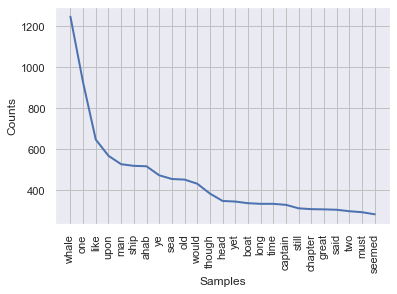

In [35]:
# Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

In [36]:
### BONUS MATERIAL

In [40]:
def plot_word_freq(url):
    """Takes a url and plots a word frequency dist"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but now in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

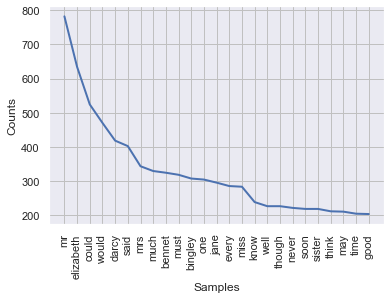

In [41]:
# Pride and Prejudice
plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

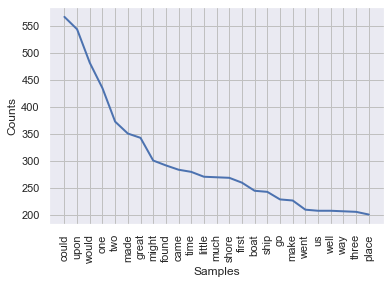

In [42]:
# Robinson Crusoe
plot_word_freq('https://www.gutenberg.org/files/521/521-h/521-h.htm')

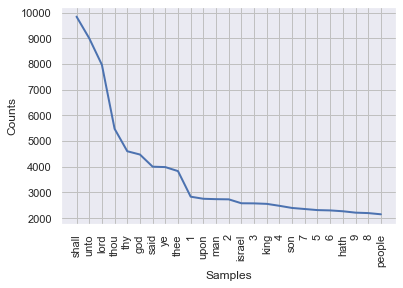

In [43]:
# The King James Bible
plot_word_freq('https://www.gutenberg.org/files/10/10-h/10-h.htm')